In [7]:
import pickle as p

stats = './../ssss.pkl'

In [8]:
data = None

with open(stats, 'rb') as f:
    data = p.load(f)

In [11]:
import matplotlib.pyplot as plt

x = []
frame_ap = []
onset_mae = []
offset_mae = []
vel_mae = []
for i in data['validation']:                 # CHANGE DATA SPLIT HERE
    frame_ap.append(i['frame_ap'])
    onset_mae.append(i['reg_onset_mae'])
    offset_mae.append(i['reg_offset_mae'])
    vel_mae.append(i['velocity_mae'])
    x.append(i['iteration'])

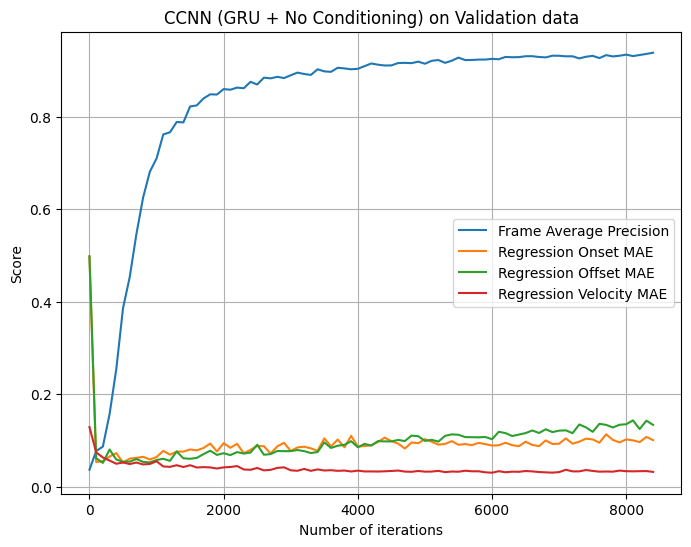

In [12]:
plt.figure(figsize=(8, 6))

plt.plot(x, frame_ap, label='Frame Average Precision')
plt.plot(x, onset_mae, label='Regression Onset MAE')
plt.plot(x, offset_mae, label='Regression Offset MAE')
plt.plot(x, vel_mae, label='Regression Velocity MAE')

# Add legend
plt.legend()

# Set title and labels
plt.title('CCNN (GRU + No Conditioning) on Validation data')          # CHANGE TITLE OF PLOT BASED ON SPLIT HERE
plt.xlabel('Number of iterations')
plt.ylabel('Score')

# Show the plot
plt.grid(True)
plt.show()